In [1]:
from diffusers import DiffusionPipeline
import torch

In [2]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
prompts_with_naruto=[
    "Naruto Uzumaki eating ramen",
    "Bill Gates in Naruto style",
    "A boy with blue eyes in Naruto style",
]
prompts_without_naruto=[
    "Uzumaki eating ramen",
    "Bill Gates photo",
    "A boy with blue eyes",
]
negative_prompt = "low quality, blurry, distorted"


In [4]:
image_normal1a = pipe(
    prompt=prompts_with_naruto[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_normal2a = pipe(
    prompt=prompts_with_naruto[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_normal3a = pipe(
    prompt=prompts_with_naruto[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [7]:
image_normal1a.save("/content/image_normal1a.png")
image_normal2a.save("/content/image_normal2a.png")
image_normal3a.save("/content/image_normal3a.png")

In [6]:
image_normal1b = pipe(
    prompt=prompts_without_naruto[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_normal2b = pipe(
    prompt=prompts_without_naruto[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_normal3b = pipe(
    prompt=prompts_without_naruto[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
image_normal1b.save("/content/image_normal1b.png")
image_normal2b.save("/content/image_normal2b.png")
image_normal3b.save("/content/image_normal3b.png")

In [10]:
lora_path = "/content/model/pytorch_lora_weights.safetensors"   # Path containing the LoRA .safetensors file
pipe.load_lora_weights(lora_path, adapter_name="my-lora_500_epoch")
pipe.set_adapters("my-lora_500_epoch")

# merges the LoRA weights directly into the base model weights. Faster inference and low VRAM usage.
pipe.fuse_lora(lora_scale=1.0)


In [11]:
image_train1a = pipe(
    prompt=prompts_with_naruto[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_train2a = pipe(
    prompt=prompts_with_naruto[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_train3a = pipe(
    prompt=prompts_with_naruto[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [12]:
image_train1a.save("/content/image_train1a.png")
image_train2a.save("/content/image_train2a.png")
image_train3a.save("/content/image_train3a.png")

In [14]:
image_train1b = pipe(
    prompt=prompts_without_naruto[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_train2b = pipe(
    prompt=prompts_without_naruto[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_train3b = pipe(
    prompt=prompts_without_naruto[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
image_train1b.save("/content/image_train1b.png")
image_train2b.save("/content/image_train2b.png")
image_train3b.save("/content/image_train3b.png")

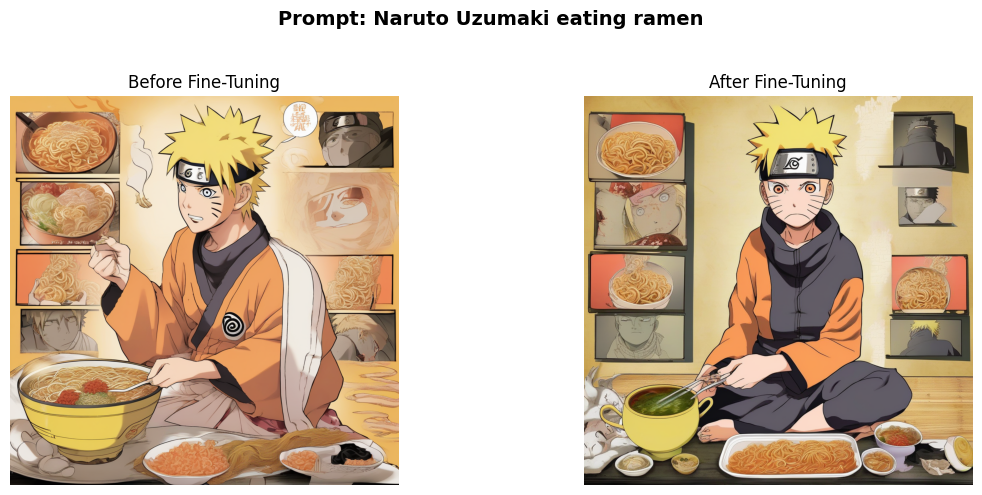

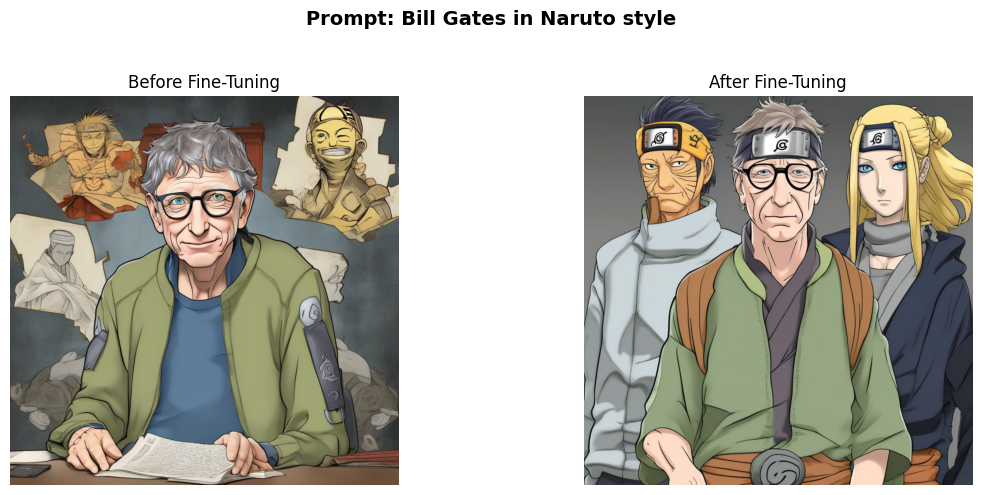

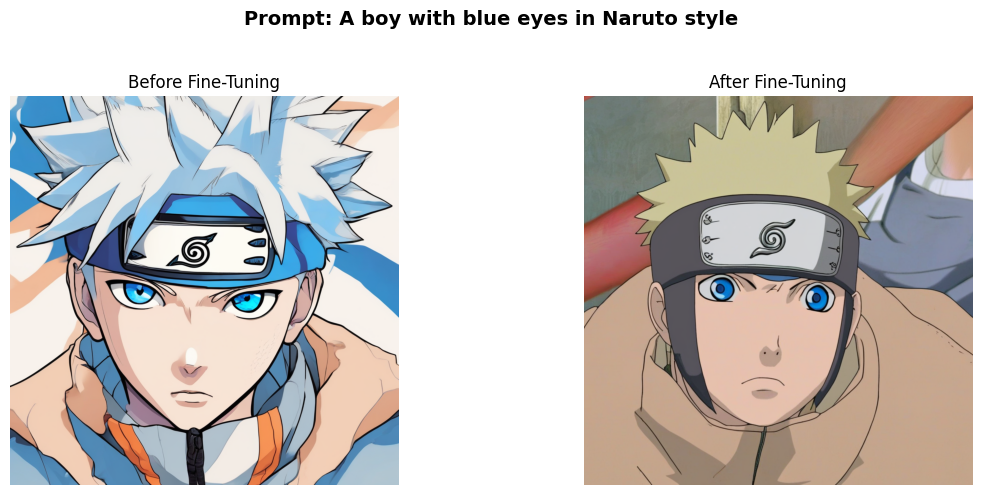

In [17]:
import matplotlib.pyplot as plt

# Data structure for clean handling
results = [
    (prompts_with_naruto[0], image_normal1a, image_train1a),
    (prompts_with_naruto[1], image_normal2a, image_train2a),
    (prompts_with_naruto[2], image_normal3a, image_train3a),
]

# Loop through each prompt result
for prompt, before_img, after_img in results:
    plt.figure(figsize=(12, 5))

    plt.suptitle(f"Prompt: {prompt}", fontsize=14, fontweight="bold")

    # Before Fine-Tuning
    plt.subplot(1, 2, 1)
    plt.imshow(before_img)
    plt.title("Before Fine-Tuning")
    plt.axis("off")

    # After Fine-Tuning
    plt.subplot(1, 2, 2)
    plt.imshow(after_img)
    plt.title("After Fine-Tuning")
    plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


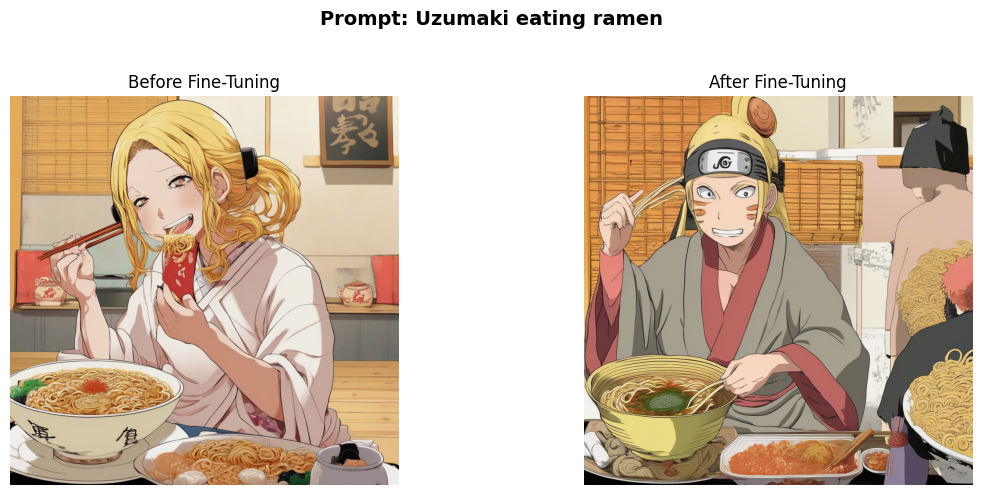

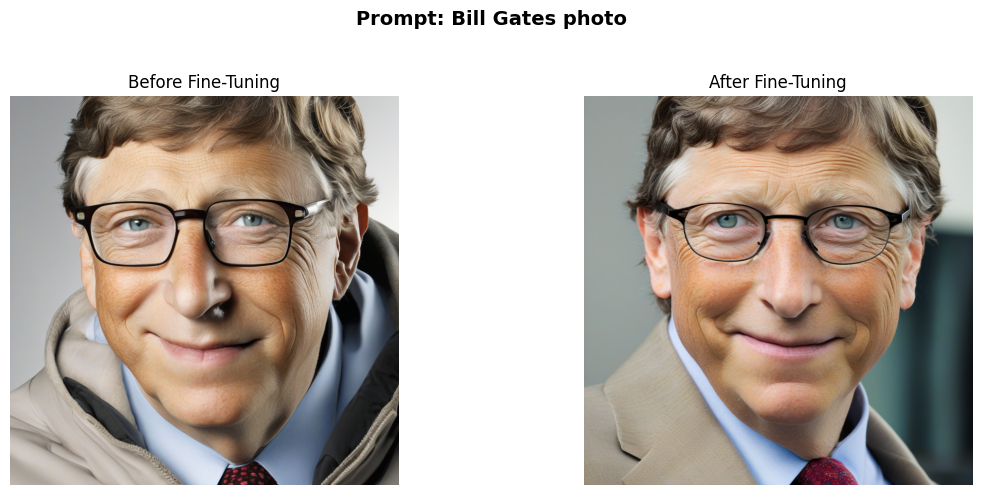

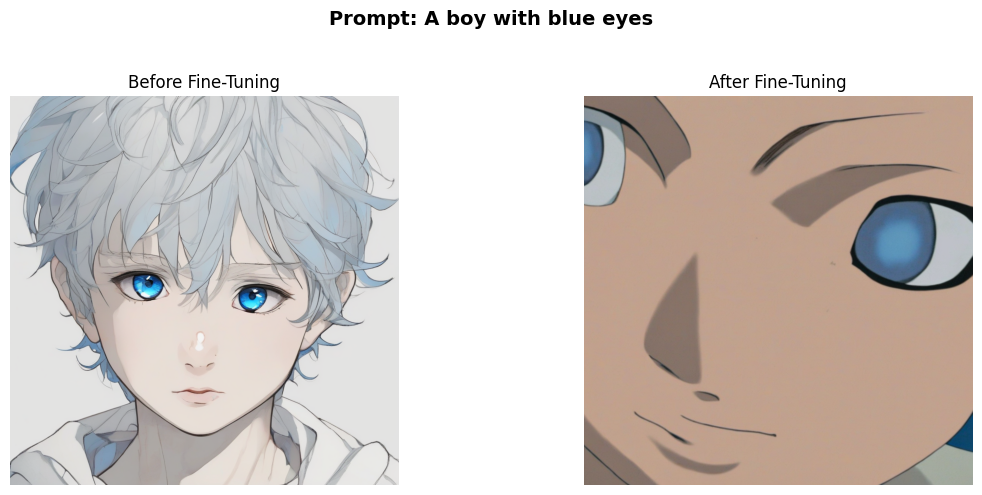

In [18]:
import matplotlib.pyplot as plt

# Data structure for clean handling
results = [
    (prompts_without_naruto[0], image_normal1b, image_train1b),
    (prompts_without_naruto[1], image_normal2b, image_train2b),
    (prompts_without_naruto[2], image_normal3b, image_train3b),
]

# Loop through each prompt result
for prompt, before_img, after_img in results:
    plt.figure(figsize=(12, 5))

    plt.suptitle(f"Prompt: {prompt}", fontsize=14, fontweight="bold")

    # Before Fine-Tuning
    plt.subplot(1, 2, 1)
    plt.imshow(before_img)
    plt.title("Before Fine-Tuning")
    plt.axis("off")

    # After Fine-Tuning
    plt.subplot(1, 2, 2)
    plt.imshow(after_img)
    plt.title("After Fine-Tuning")
    plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()